<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/Time%20Series/stock_algo_trading_CCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importing the libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# !pip yfinance
import yfinance as yf

# !pip install ta
from ta import * # like any other bad programemr would do... 

In [15]:
share = 'SPXL'

dataset = yf.download(share,"2008-11-11") #, start="2017-01-01"
dataset = dataset.drop(columns=['Adj Close','Volume'])
dataset['MA'] = dataset.Close.rolling(window=5).mean()
dataset=dataset.dropna()
dataset.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,MA
Date,,,,,
2008-11-17,2.956667,3.170833,2.833333,2.850833,3.194000
2008-11-18,2.836667,2.995000,2.595833,2.876667,3.077500
2008-11-19,2.875000,2.970833,2.366667,2.413333,2.945333
2008-11-20,2.324167,2.497500,1.846667,1.996667,2.641000
2008-11-21,2.266667,2.270000,1.805833,2.222500,2.472000
2008-11-24,2.371667,2.797500,2.316667,2.597500,2.421333
2008-11-25,2.834167,2.845833,2.525000,2.742500,2.394500
2008-11-26,2.587500,3.045000,2.575833,3.028333,2.517500
2008-11-28,2.991667,3.125000,2.979167,3.118333,2.741833


The brainless strategy


In [6]:
def noStrat():
  df2 = dataset.iloc[0::1] #[1::20] start at 1, every 20th (monthly)
  invPerMonth = 1000/20
  total =0
  shares=0 

  for i, row in df2.iterrows():
      numShares = math.floor((invPerMonth)/row.Close.round(2))
      shares+=numShares
      invPerMonth -= (row.Close.round(2) * numShares)

      invPerMonth += 1000/20

  #print("invPerMonth: ",invPerMonth)
  #print("num of shares" , shares)
  #print("num of shares * last closing ",int(dataset.tail(1).Close*shares)) #dataset.tail, not df2.tail
  #print("total: ", (int(dataset.tail(1).Close*shares)+invPerMonth))

  return int(dataset.tail(1).Close*shares+invPerMonth)

resultOfNoStrat = noStrat()
#resultOfNoStrat
f'{resultOfNoStrat:,}'  # For Python ≥3.7


'862,344'

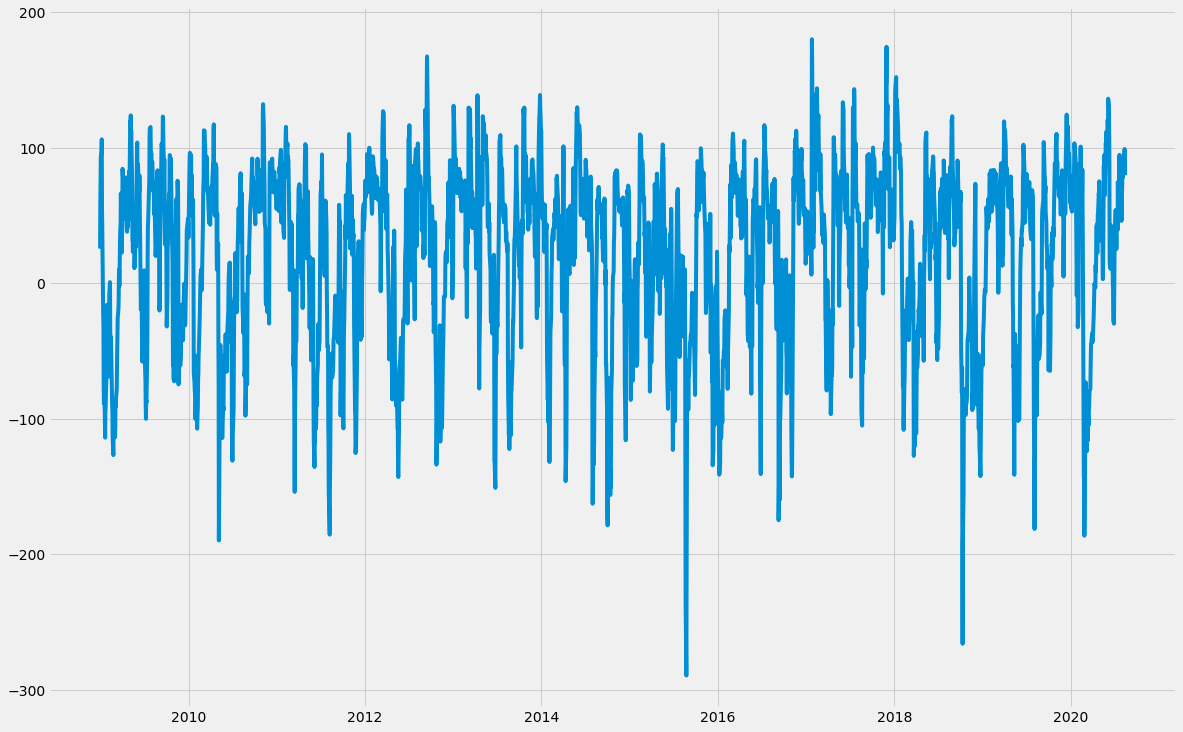

In [7]:
import ta 
C =0.025#0.015
cci2 = trend.cci(dataset.High,dataset.Low,dataset.Close, n=30, c=C,fillna=False)
cci3 = trend.cci(dataset.High,dataset.Low,dataset.Close, n=30, c=C,fillna=False)
cci4 = trend.cci(dataset.High,dataset.Low,dataset.Close, n=40, c=C,fillna=False)

fig =plt.figure(figsize=(18,12))
plt.plot(cci2)
plt.show()

In [8]:
# plt.figure(figsize=(18,12))
# plt.plot(cci3)
# plt.show()

In [9]:
# plt.figure(figsize=(18,12))
# plt.plot(cci4)
# plt.show()

In [10]:
dataset["cci"] = cci2
dataset=dataset.dropna()
dataset.head(5)

,Open,High,Low,Close,MA,cci
Date,,,,,,
2008-12-30,2.795833,2.935833,2.754167,2.932500,2.768000,25.496406
2008-12-31,2.944167,3.128333,2.926667,3.032500,2.838667,57.388247
2009-01-02,3.090000,3.385000,3.025000,3.329167,2.962333,92.768018
2009-01-05,3.291667,3.428333,3.224167,3.329167,3.074667,97.136167
2009-01-06,3.419167,3.508333,3.322500,3.410000,3.206667,106.094565


In [11]:
def CCIStrat(dataset=dataset):
  df2 = dataset.iloc[0::1] #[1::20] start at 1, every 20th (monthly)
  
  
  
  top_total=0
  top_min=0
  top_max=0
  
  
  cci_min = int(df2['cci'].min())-5
  
  cci_max = int(df2['cci'].max())+5
  for max in np.arange(cci_max)[::10]:
    #print(max)
    
  
    for min in np.arange(cci_min*-1)[::10]:
      min=min*-1
      #print(min)
      moneyToInvest = 1000/20
      total =0
      shares=0 
      for i in df2.index:
        
        
        
        
        Cci = df2.loc[i].at['cci']   #print(type(df2)) # <class 'pandas.core.frame.DataFrame'> ... fuck python 
        Close = df2.loc[i].at['Close']
        if(Cci > max):
          #sell
          #numShares = math.floor((moneyToInvest)/row.Close.round(2))
          moneyToInvest += (Close.round(2) * shares)
          shares=0


        if(Cci< min):
          #buy 
          numShares = math.floor((moneyToInvest)/Close.round(2))
          shares+=numShares
          moneyToInvest -= (Close.round(2) * numShares)

        moneyToInvest += 1000/20
        #end of innerloop 
      total = int(dataset.tail(1).Close*shares+moneyToInvest)
      if(total >top_total):
        top_total = total
        top_min   = min
        top_max   = max 
#       print("   min: {}\n   max: {}\n   total: {}".format(min,max,total))
  #print("moneyToInvest: ",moneyToInvest)
  #print("num of shares" , shares)
  #print("num of shares * last closing ",int(dataset.tail(1).Close*shares)) #dataset.tail, not df2.tail
  #print("total: ", (int(dataset.tail(1).Close*shares)+moneyToInvest))
  print("=========================================================")
  print("   min: {}\n   max: {}\n   total: {}".format(top_min,top_max,top_total))
#   return int(dataset.tail(1).Close*shares+moneyToInvest)

resultOfCCStrat = CCIStrat()
#resultOfCCStrat
#f'{resultOfCCStrat:,}'  # For Python ≥3.7


   min: -20
   max: 130
   total: 1239750



### Classic $0 down, continuous investment strategy: 758,196



### CCI $0 down, continuous investment strategy, in which we buy only when below a '*lower*', and  sell when greater than an '*upper*'

cci2 = trend.cci(dataset.High,dataset.Low,dataset.Close, n=20, c=0.025,fillna=False)

    upper 150 ; lower -75 ; yeilds 811,814


cci2 = trend.cci(dataset.High,dataset.Low,dataset.Close, n=30, c=0.025,fillna=False)

    upper 105 ; lower -90 ; yeilds 11,281,712,040


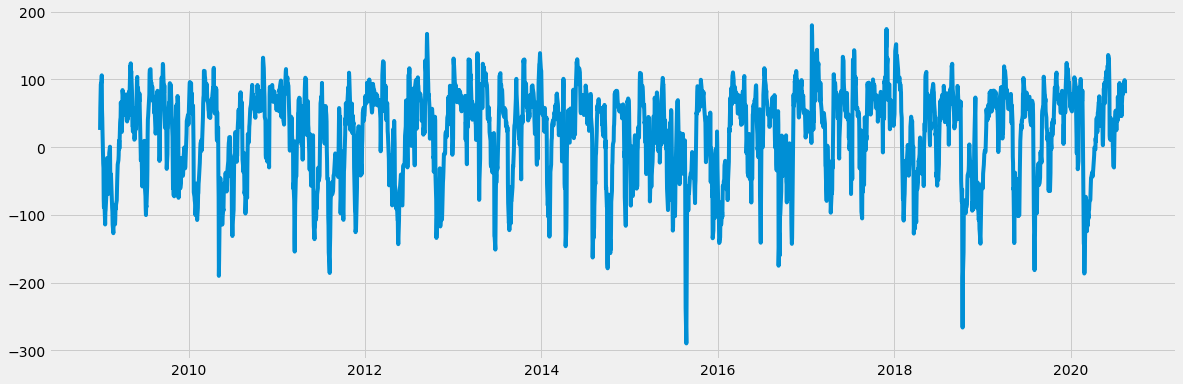

In [12]:
fig =plt.figure(figsize=(18,6))
plt.plot(dataset.cci)
plt.show()

In [13]:
moneyToInvest = 1000/20
total=0
shares=0 

for i in dataset.index:
  Cci = dataset.loc[i].at['cci']   #print(type(df2)) # <class 'pandas.core.frame.DataFrame'> ... fuck python 
  Close = dataset.loc[i].at['Close']
  if(Cci > 100):
    #sell
    #numShares = math.floor((moneyToInvest)/row.Close.round(2))
    moneyToInvest += (Close.round(2) * shares)
    shares=0


  if(Cci< -60):
    #buy 
    numShares = math.floor((moneyToInvest)/Close.round(2))
    shares+=numShares
    moneyToInvest -= (Close.round(2) * numShares)

  moneyToInvest += 1000/20
  total = int(dataset.tail(1).Close*shares+moneyToInvest)

print("  total: {}".format(total))

  total: 403559
